In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting


pd.set_option('display.float_format', '{:,.0f}'.format)

ticker = "bp.l".upper()
period = "10y"
stock = yf.Ticker(ticker)
history = stock.history(period=period)

/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"2,519","2,519","2,519","2,519","2,519","2,519","2,519"
mean,331,335,327,331,"42,465,400",0,0
std,85,85,84,85,"23,130,752",1,0
min,161,164,4,163,0,0,0
25%,261,265,258,262,"28,222,816",0,0
50%,314,318,312,315,"36,555,284",0,0
75%,403,406,399,403,"50,345,624",0,0
max,544,547,538,543,"257,457,024",8,0


In [5]:
stock.cash_flow

,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,"28,863,000,000","12,725,000,000","-144,000,000"
Repurchase Of Capital Stock,"-9,996,000,000","-3,151,000,000","-776,000,000"
Repayment Of Debt,"-11,697,000,000","-16,804,000,000","-12,179,000,000"
Issuance Of Debt,"2,013,000,000","6,987,000,000","14,736,000,000"
Capital Expenditure,"-12,069,000,000","-10,887,000,000","-12,306,000,000"
End Cash Position,"29,195,000,000","30,681,000,000","31,111,000,000"
Beginning Cash Position,"30,681,000,000","31,111,000,000","22,472,000,000"
Effect Of Exchange Rate Changes,"-684,000,000","-269,000,000","379,000,000"
Changes In Cash,"-802,000,000","-161,000,000","8,260,000,000"
Financing Cash Flow,"-28,021,000,000","-18,079,000,000","3,956,000,000"


In [6]:
stock.financials

,2022-12-31,2021-12-31,2020-12-31
Tax Effect Of Unusual Items,"-5,137,790,000","537,700,000","-3,642,590,000"
Tax Rate For Calcs,0,0,0
Normalized EBITDA,"59,424,000,000","29,914,000,000","14,543,000,000"
Total Unusual Items,"-27,041,000,000","2,830,000,000","-21,427,000,000"
Total Unusual Items Excluding Goodwill,"-27,041,000,000","2,830,000,000","-21,427,000,000"
Net Income From Continuing Operation Net Minority Interest,"-2,487,000,000","7,565,000,000","-20,305,000,000"
Reconciled Depreciation,"14,318,000,000","14,805,000,000","14,889,000,000"
Reconciled Cost Of Revenue,"186,296,000,000","134,879,000,000","95,760,000,000"
EBITDA,"32,383,000,000","32,744,000,000","-6,884,000,000"
EBIT,"18,065,000,000","17,939,000,000","-21,773,000,000"


In [7]:
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-02-20 00:00:00+00:00,273,277,273,277,37333379,0,0
2014-02-21 00:00:00+00:00,277,280,277,278,39490300,0,0
2014-02-24 00:00:00+00:00,276,280,276,280,32337102,0,0
2014-02-25 00:00:00+00:00,280,282,279,281,53548379,0,0
2014-02-26 00:00:00+00:00,281,282,279,281,21231256,0,0
...,...,...,...,...,...,...,...
2024-02-14 00:00:00+00:00,473,477,468,469,83053311,0,0
2024-02-15 00:00:00+00:00,469,471,462,469,47956226,7,0
2024-02-16 00:00:00+00:00,472,476,469,472,68994296,0,0


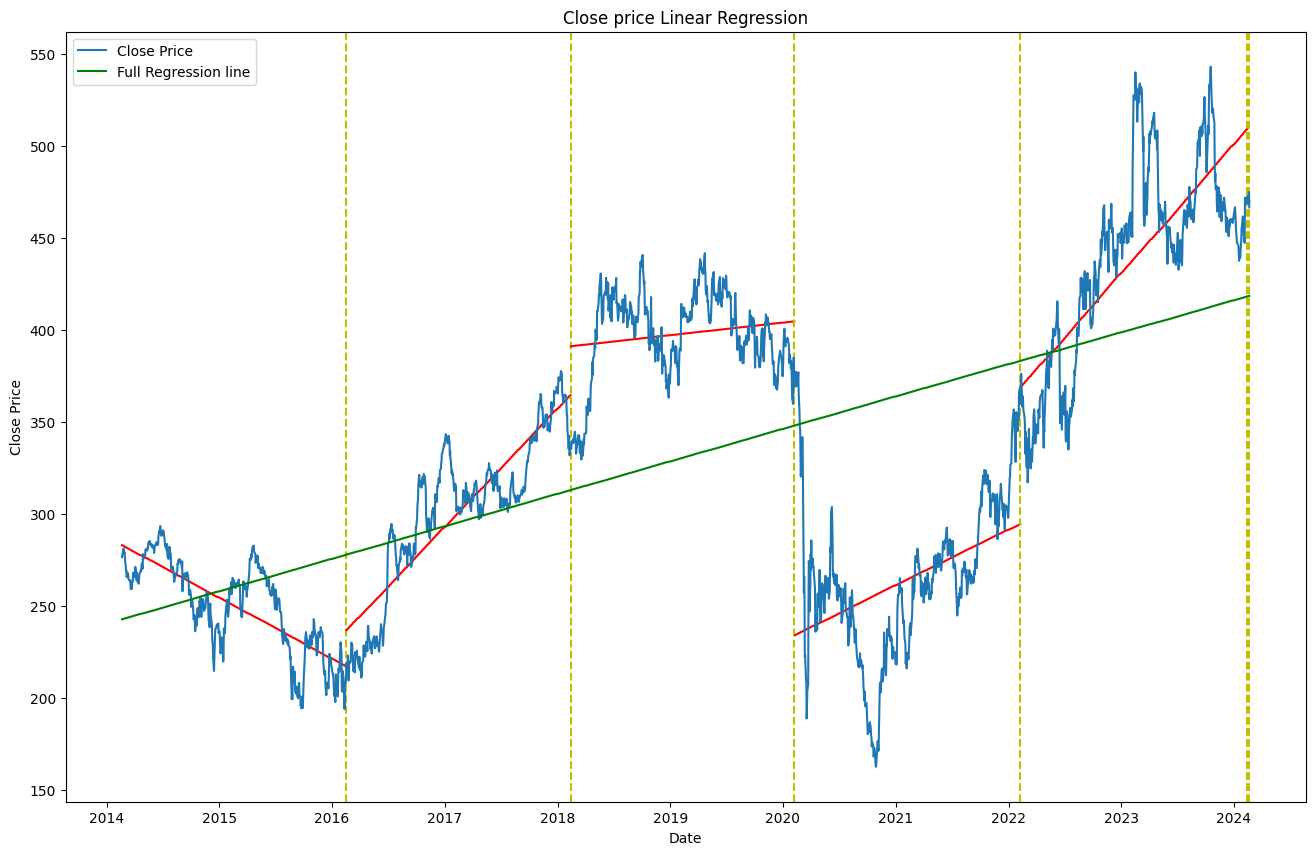

In [8]:
plotting.plot_regression_line(history, reg_line_count=5)

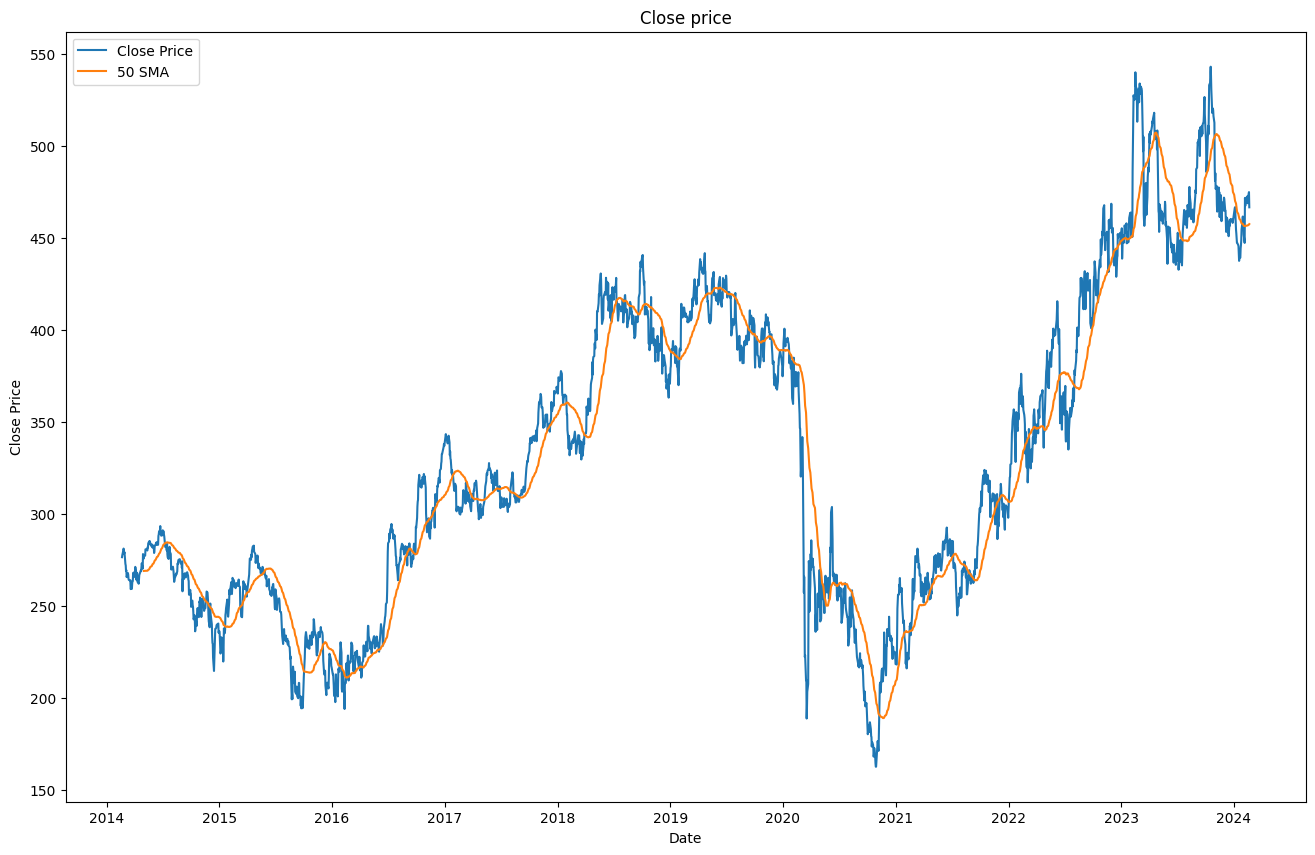

In [9]:
plotting.plot_sma(history, [50])

In [24]:
a = history['Close'] / history['Close'].shift(1)
a

Date
2014-02-20 00:00:00+00:00   NaN
2014-02-21 00:00:00+00:00     1
2014-02-24 00:00:00+00:00     1
2014-02-25 00:00:00+00:00     1
2014-02-26 00:00:00+00:00     1
                             ..
2024-02-14 00:00:00+00:00     1
2024-02-15 00:00:00+00:00     1
2024-02-16 00:00:00+00:00     1
2024-02-19 00:00:00+00:00     1
2024-02-20 00:00:00+00:00     1
Name: Close, Length: 2519, dtype: float64